# Introduction

This project has helped us analyze 5 portfolios which are – all equity portfolio, traditional 60/40 portfolio, Harry Browne’s permanent portfolio, Ray Dalio’s all season’s portfolio and a custom portfolio. 
We have considered the asset class returns in each portfolio and the pros and cons of each asset class. The project also includes the analysis of each portfolio and if they are mean variance efficient or not. We have also highlighted certain points with which we can improve each portfolio. Risk aversion of the investor has been taken into consideration. Certain limitations of our analysis have also been highlighted.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas_datareader as pdr

In [71]:
data = pd.read_csv('histretSP.csv', index_col=0)  

print(data.head())

print(data.describe())

       S&P 500  T-Bill    T-Bond  Baa Bond  Real Estate      Gold
Year                                                             
1928  0.438112  0.0308  0.008355  0.032196     0.014911  0.000969
1929 -0.082979  0.0316  0.042038  0.030179    -0.020568 -0.001452
1930 -0.251236  0.0455  0.045409  0.005398    -0.043000  0.000969
1931 -0.438375  0.0231 -0.025589 -0.156808    -0.081505 -0.173850
1932 -0.086424  0.0107  0.087903  0.235896    -0.104664  0.212778
         S&P 500     T-Bill     T-Bond   Baa Bond  Real Estate       Gold
count  96.000000  96.000000  96.000000  96.000000    96.000000  96.000000
mean    0.116578   0.033385   0.048587   0.069537     0.044181   0.065542
std     0.195508   0.030075   0.079517   0.077123     0.062416   0.207722
min    -0.438375   0.000327  -0.178282  -0.156808    -0.119956  -0.325986
25%    -0.011935   0.008508   0.008063   0.023922     0.009206  -0.005910
50%     0.145211   0.029350   0.032822   0.063554     0.038540   0.000969
75%     0.259666   0

# Portfolio Returns and Volatility

In [72]:
annual_returns = data.mean()
volatility = data.std()

portfolios = {
    "All-Equity": {"S&P 500": 1.0},
    "Traditional 60/40": {"S&P 500": 0.6, "T-Bond": 0.4},
    "Harry Browne’s Permanent": {"S&P 500": 0.25, "T-Bond": 0.25, "T-Bill": 0.25, "Gold": 0.25},
    "Ray Dalio’s All Seasons": {"S&P 500": 0.3, "T-Bond": 0.55, "Gold": 0.15},
}

portfolio_returns = {}
portfolio_volatility = {}
cov_matrix = data.cov()

for name, composition in portfolios.items():
    weights = np.array([composition.get(asset, 0) for asset in data.columns])
    portfolio_returns[name] = np.dot(weights, annual_returns)
    portfolio_volatility[name] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
print("Portfolio Returns:")
for portfolio_name, return_value in portfolio_returns.items():
    print(f"{portfolio_name}: {return_value*100:.3f}%")
    
print("\nPortfolio Volatility:")
for portfolio_name, volatility_value in portfolio_volatility.items():
    print(f"{portfolio_name}: {volatility_value*100:.3f}%")

Portfolio Returns:
All-Equity: 11.658%
Traditional 60/40: 8.938%
Harry Browne’s Permanent: 6.602%
Ray Dalio’s All Seasons: 7.153%

Portfolio Volatility:
All-Equity: 19.551%
Traditional 60/40: 12.225%
Harry Browne’s Permanent: 7.308%
Ray Dalio’s All Seasons: 7.832%


# Pros & Cons of Portfolios

## All-Equity Portfolio 
- **Pros:**
  - Maximum exposure to equity markets potentially offering higher returns over the long term that is immense growth potential
  - Highly liquid portfolio
- **Cons:**
  - Highly susceptible to market volatility
  - No hedging or diversification to mitigate risk.

## Traditional 60/40 Portfolio
- **Pros:**
  - Balanced approach that provides growth potential through equities and income/stability through bonds.
  - Historically, has reduced volatility and provided smoother returns over time.
- **Cons:**
  - The performance may be hampered in environments where both equities and bonds underperform simultaneously.
  - Bonds provide low returns in a low interest rate environment thereby making them highly sensitive to interest rate changes, potentially offsetting equity gains.
  - Bonds may not generate significant wealth accumulation compared to other asset classes over the long-term. 

## Harry Browne’s Permanent Portfolio 
- **Pros:**
  - Well-diversified across asset classes, designed to mitigate risks in any economic environment.
  - The inclusion of T-Bills and Gold can protect against inflation and currency devaluation.
  - Includes commodities(gold) has a low correlation with both equities and bonds, providing a diversification benefit.
- **Cons:**
  - Capping equity exposure to 25% could limit growth in a strong stock market.
  - High volatility, as commodities are greatly affected by global economic conditions.
  - Inflation or rising interest rates could impact both the T-Bond and T-Bill portions.
  - The conservative nature may result in lower overall returns compared to a more equity-heavy portfolio.

## Ray Dalio’s All Seasons Portfolio 
- **Pros:**
  - Further diversification aiming to minimize risk while ensuring steady returns.Diversified yet conservative allocation aims to protect against losses in any single asset class.
  - Aims to perform well across different economic climates by being weighted heavily towards bonds.
  - The inclusion of Gold, typically having a low or negative correlation with equities and bonds, offers a hedge against inflation and currency devaluation risks.

- **Cons:**
  - The heavy weight in bonds could underperform in a rising interest rate environment.
  - May not capture as much upside during equity bull markets due to lower allocation to stocks, which could result in underperformance compared to more equity-focused portfolios.

# Calculation of Risk Free Rate

In [73]:
ff = pdr.DataReader(
    name='F-F_Research_Data_Factors',
    data_source='famafrench',
    start='1900'
)
ff_y = pd.DataFrame(ff[1].div(100))

ff_y = ff_y.drop(ff_y.index[0])
risk_free_rate =  ff_y['RF'].mean()
risk_free_rate

/var/folders/b0/j17_z8ks51s7txmkb033x9m80000gn/T/ipykernel_10265/3513930275.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pdr.DataReader(
/var/folders/b0/j17_z8ks51s7txmkb033x9m80000gn/T/ipykernel_10265/3513930275.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff = pdr.DataReader(


0.033038541666666664

# Sharpe Ratio Computation

In [74]:
sharpe_ratios = {}

for name in portfolios:
    expected_return = portfolio_returns[name]
    std_dev = portfolio_volatility[name]
    sharpe_ratio = (expected_return - risk_free_rate) / std_dev
    sharpe_ratios[name] = sharpe_ratio

sharpe_ratios

{'All-Equity': 0.4272978165400334,
 'Traditional 60/40': 0.46090419367155516,
 'Harry Browne’s Permanent': 0.45133800843658534,
 'Ray Dalio’s All Seasons': 0.4914555100004722}

# Calculation of Cumulative Returns of Portfolios

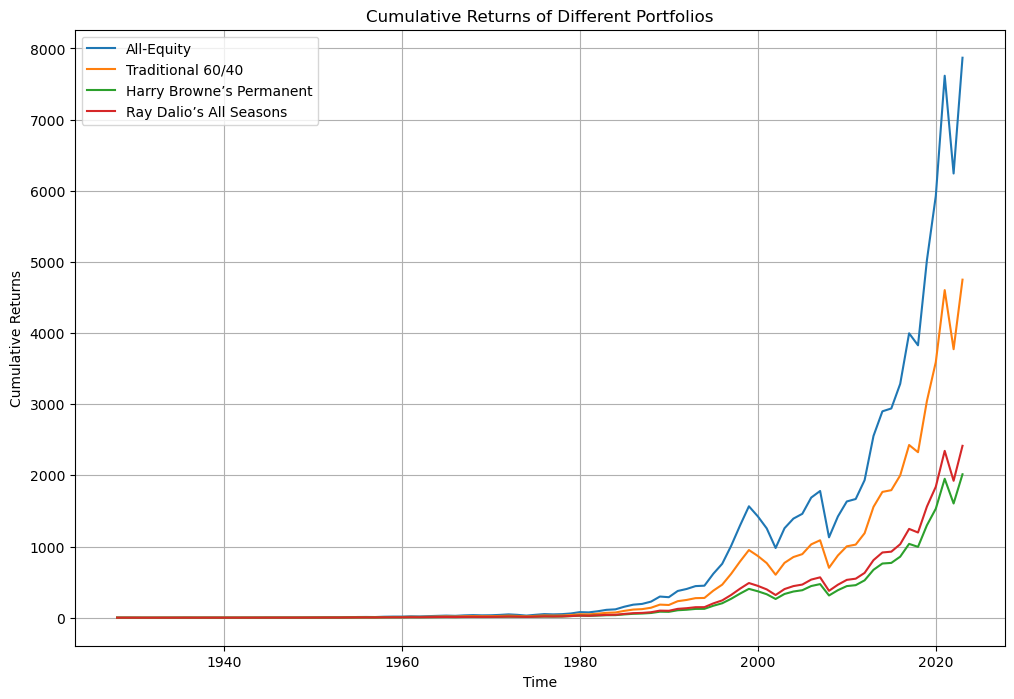

In [75]:
cumulative_returns_assets = (1 + data).cumprod() - 1

def calculate_cumulative_returns(portfolios, cumulative_returns_assets):
    portfolio_cumulative_returns = pd.DataFrame(index=cumulative_returns_assets.index)
    for name, composition in portfolios.items():
        portfolio_cumulative = sum(cumulative_returns_assets[asset] * weight for asset, weight in composition.items())
        portfolio_cumulative_returns[name] = portfolio_cumulative
    return portfolio_cumulative_returns

portfolio_cumulative_returns = calculate_cumulative_returns(portfolios, cumulative_returns_assets)

# Plotting the cumulative returns
plt.figure(figsize=(12, 8))
for column in portfolio_cumulative_returns.columns:
    plt.plot(portfolio_cumulative_returns[column], label=column)
plt.title('Cumulative Returns of Different Portfolios')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

- **All-Equity Portfolio**: Exhibits the highest cumulative return, indicating high risk and potential rewards consistent with 100% equity allocation.
- **Traditional 60/40 Portfolio**: Shows moderate cumulative growth, balancing risk with a mix of stocks and bonds.
- **Harry Browne’s Permanent Portfolio**: Displays steady growth with less volatility, aligning with its diversified approach and focus on capital preservation.
- **Ray Dalio’s All Seasons Portfolio**: Demonstrates consistent growth with better risk management, though not as aggressive in returns as the All-Equity portfolio.

# Correlation Heatmap of Asset Classes

<Axes: >

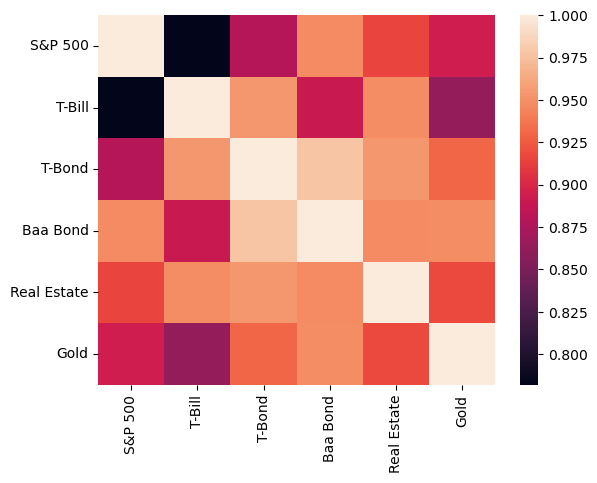

In [79]:
port_corr = cumulative_returns_assets.corr()

sns.heatmap(cumulative_returns_assets.corr())

# Asset Class Pros and Cons and Their Roles in Portfolios

## Equity (S&P 500)
### All-Equity Portfolio
- **Role:** Sole investment class, aiming for maximum growth.
- **Pros:**
  - High return potential over the long term.
- **Cons:**
  - High volatility increases risk during market downturns.
  - Lacks diversification benefits, leading to a concentration risk.

### Traditional 60/40 Portfolio
- **Role:** Provides growth and represents the majority share of the portfolio's aggressive side.
- **Pros:**
  - Dominant growth driver, capturing the upside of market movements.
- **Cons:**
  - Represents a significant source of volatility, even at a 60% allocation.

### Harry Browne’s Permanent Portfolio
- **Role:** One component of a diversified approach to handle various economic conditions.
- **Pros:**
  - Contributes to capital appreciation while being balanced by other asset classes.
- **Cons:**
  - Limited exposure means reduced potential for high returns compared to an all-equity portfolio.

### Ray Dalio’s All Seasons Portfolio
- **Role:** Part of a diversified strategy to achieve consistent returns.
- **Pros:**
  - Provides the potential for growth within a framework designed to minimize risk.
- **Cons:**
  - At a 30% allocation, equity downturns can still affect the portfolio, albeit to a lesser extent.

## Bonds (T-Bill, T-Bond, Baa Bond)
### Traditional 60/40 Portfolio
- **Role:** Acts as a stabilizing force and source of income.
- **Pros:**
  - Buffers against equity volatility and contributes to lower portfolio risk.
- **Cons:**
  - In a low interest rate environment, the income generated may be less attractive.

### Harry Browne’s Permanent Portfolio
- **Role:** Divides the portfolio into equal parts of growth, income, and hedge components.
- **Pros:**
  - T-Bills offer liquidity and safety; T-Bonds provide income and have negative correlation with equities.
- **Cons:**
  - May underperform in a strong equity market.

### Ray Dalio’s All Seasons Portfolio
- **Role:** Acts as the main protective and income-generating asset.
- **Pros:**
  - High allocation to T-Bonds aims to ensure the portfolio is less affected by equity market fluctuations.
- **Cons:**
  - Overexposure to interest rate risk due to high allocation in bonds.

## Commodities (Gold)
### Harry Browne’s Permanent Portfolio
- **Role:** Serves as a hedge against inflation and economic uncertainty.
- **Pros:**
  - Non-correlated asset class that provides protection during periods of high inflation or currency devaluation.
- **Cons:**
  - The price of gold can be highly volatile, influenced by global economic factors.

### Ray Dalio’s All Seasons Portfolio
- **Role:** Part of a diversification strategy and hedge against inflation.
- **Pros:**
  - Helps to preserve capital during times of inflation or currency weakness.
- **Cons:**
  - Allocating only 15% to gold means limited protection from its hedge properties.


# Mean-Variance Efficiency now vs. when it was proposed 

In [55]:
# Define the portfolio configurations
portfolios = {
    "Harry Browne’s Permanent 1928-1980": {"weights": np.array([0.25, 0.25, 0.25, 0.25]), "period": slice(0, 53)},
    "Ray Dalio’s All Seasons 1928-2014": {"weights": np.array([0.30, 0.55, 0.00, 0.15]), "period": slice(0, 87)}
}

# Compute returns and volatilities
def portfolio_metrics(data, weights, period):
    filtered_data = data.iloc[period]
    asset_class = filtered_data[['S&P 500', 'T-Bond', 'T-Bill', 'Gold']]
    portfolio_return = np.dot(asset_class, weights)
    
    # Annualized Return
    annual_return = np.mean(portfolio_return) * 100
    
    # Portfolio Volatility
    covariance_matrix = np.cov(asset_class.T, rowvar=True)
    annual_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights))) * np.sqrt(100)
    
    return annual_return, annual_volatility

# Calculate metrics and output results
for name, config in portfolios.items():
    return_val, vol_val = portfolio_metrics(data, config['weights'], config['period'])
    print(f"{name}: Return = {return_val:.2f}%, Volatility = {vol_val*10:.2f}%")

Harry Browne’s Permanent 1928-1980: Return = 6.31%, Volatility = 7.98%
Ray Dalio’s All Seasons 1928-2014: Return = 7.34%, Volatility = 7.61%


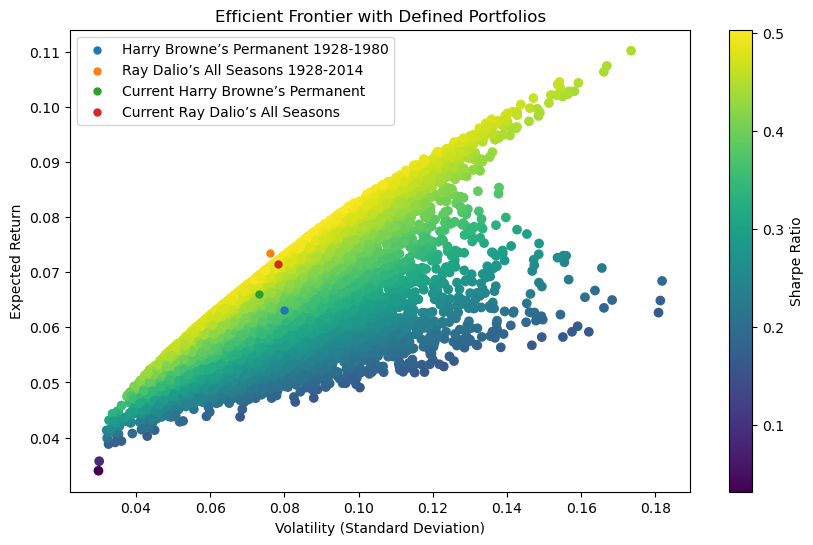

In [61]:
rf = 0.033038541666666664

portfolios = {
    "Harry Browne’s Permanent 1928-1980": {"weights": np.array([0.25, 0.25, 0.25, 0.25]), "period": slice(0, 53)},
    "Ray Dalio’s All Seasons 1928-2014": {"weights": np.array([0.30, 0.55, 0.00, 0.15]), "period": slice(0, 87)},
    "Current Harry Browne’s Permanent": {"weights": np.array([0.25, 0.25, 0.25, 0.25]), "period": slice(None, None)},
    "Current Ray Dalio’s All Seasons": {"weights": np.array([0.30, 0.55, 0.00, 0.15]), "period": slice(None, None)}
}

def portfolio_metrics(data, weights, period):
    filtered_data = data.iloc[period]
    asset_classes = filtered_data[['S&P 500', 'T-Bond', 'T-Bill', 'Gold']]
    returns = np.dot(asset_classes, weights)
    mean_return = returns.mean()
    volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(asset_classes, rowvar=False), weights)))
    sharpe_ratio = (mean_return - rf) / volatility
    return mean_return, volatility, sharpe_ratio

results = {}
for name, config in portfolios.items():
    ret, vol, sharpe = portfolio_metrics(data, config['weights'], config['period'])
    results[name] = {"Return": ret, "Volatility": vol, "Sharpe Ratio": sharpe}

# Generate random portfolios for comparison
num_portfolios = 10000
random_returns = []
random_volatilities = []
random_sharpe_ratios = []
for _ in range(num_portfolios):
    weights = np.random.random(4)
    weights /= weights.sum()
    ret = np.dot(weights, data[['S&P 500', 'T-Bond', 'T-Bill', 'Gold']].mean())
    vol = np.sqrt(np.dot(weights.T, np.dot(data[['S&P 500', 'T-Bond', 'T-Bill', 'Gold']].cov(), weights)))
    sharpe = (ret - rf) / vol
    random_returns.append(ret)
    random_volatilities.append(vol)
    random_sharpe_ratios.append(sharpe)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(random_volatilities, random_returns, c=random_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
for name, vals in results.items():
    plt.scatter(vals["Volatility"], vals["Return"], marker='.', s=100, label=name)
plt.legend()
plt.title('Efficient Frontier with Defined Portfolios')
plt.show()

The above chart illustrates the efficient frontier and includes a scatter plot of random portfolios along with defined portfolios at different time periods. Interpretation with respect to mean-variance efficiency includes:

- **Color Gradient (Sharpe Ratio)**: 
    - The color represents the Sharpe ratio, indicating return per unit of volatility.
    - Darker shades signify a lower Sharpe ratio, and lighter shades a higher one.

- **Position on the Graph**:
    - Portfolios on the top edge represent the efficient frontier, offering the maximum return for their volatility.
    - Portfolios below this edge are sub-optimal, as there exist portfolios with the same risk but higher returns, or the same returns with lower risk.

- **Defined Portfolios**:
    - **Harry Browne’s Permanent Portfolio (Red Dot)**: Positioned below the efficient frontier, suggesting inefficiency during its proposed period.
    - **Ray Dalio’s All Seasons Portfolio (Orange Dot)**: Also below the efficient frontier, indicating inefficiency during its proposed period.
    - **Current Harry Browne’s Permanent Portfolio (Blue Dot)**: Near the efficient frontier, suggesting near or actual efficiency in the current market.
    - **Current Ray Dalio’s All Seasons (Green Dot)**: Very close to the efficient frontier, implying efficiency in the current market.

- **General Observations**:
    - **Improvement Over Time**: Both Harry Browne's and Ray Dalio's portfolios are closer to the efficient frontier now compared to their initial proposal times.
    - **Relative Efficiency**: The current period Sharpe ratio for Harry Browne's portfolio is slightly lower than that for Ray Dalio's, suggesting that Dalio’s may offer better risk-adjusted returns.

In summary, the defined portfolios were not perfectly mean-variance efficient when proposed but show improved efficiency in the current period.

 ## Improvements for Each Portfolio


### All-Equity Portfolio
- **Potential Improvements:**
  - **Diversification:** Introduce bonds or other asset classes to reduce volatility.
  - **International Exposure:** Add international equities to capture growth in emerging markets and provide further diversification.
  - **Sector Allocation:** Ensure a broad sector allocation to mitigate sector-specific risks.

### Traditional 60/40 Portfolio
- **Potential Improvements:**
  - **Rebalancing Strategy:** Implement a dynamic rebalancing strategy to adjust the equity-to-bond ratio based on market conditions.
  - **Inflation-Protected Securities:** Include TIPS (Treasury Inflation-Protected Securities) to protect against inflation risk.
  - **High-Yield Bonds:** Add high-yield bonds to improve the income component while accepting slightly higher risk.

### Harry Browne’s Permanent Portfolio
- **Potential Improvements:**
  - **Equity Diversification:** Diversify equity holdings to include different market caps and styles (value/growth).
  - **Real Assets:** Introduce real estate or infrastructure assets to enhance income and inflation hedging.
  - **Alternative Strategies:** Consider liquid alternatives to provide uncorrelated returns and improve overall portfolio resilience.

### Ray Dalio’s All Seasons Portfolio
- **Potential Improvements:**
  - **Emerging Market Bonds:** Add emerging market bonds for higher yield and diversification.
  - **Equity Diversification:** Increase the allocation to equities, including small-cap and international stocks for growth potential.
  - **Commodity Diversification:** Broaden the commodity exposure beyond gold to include other commodities like oil, agricultural products, or a diversified commodity index fund.



# Optimum Portfolio

- **Objective Function**: Defined as `negative_sharpe_ratio` to maximize the Sharpe ratio by minimizing its negative value in the optimization process.
- **Initial Weights**: Evenly distributed across all assets.
- **Constraints**: Portfolio weights are constrained to sum to 1.
- **Bounds**: Set between 0 and 1 for each weight to prevent short-selling or leveraging.
- **Monte Carlo Simulation**: Simulates various risk-return profiles through numerous random portfolios.


In [81]:
import scipy.optimize as sco

# Define parameters
annual_returns = np.array([0.11658493, 0.0333, 0.0485, 0.069, 0.0441, 0.065])
volatility = np.array([0.1955, 0.03, 0.07951, 0.077, 0.0624, 0.2077])
cov_matrix = np.diag(volatility ** 2)
risk_free_rate = 0.0333
asset_names = ['S&P 500', 'T-Bill', 'T-Bond', 'Baa Bond', 'Real Estate', 'Gold']

# Negative Sharpe Ratio for minimization
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    ret = np.dot(weights, returns)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(ret - risk_free_rate) / vol

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in annual_returns)
initial_weights = np.full(len(annual_returns), 1. / len(annual_returns))

# Optimize portfolio
result = sco.minimize(negative_sharpe_ratio, initial_weights, args=(annual_returns, cov_matrix, risk_free_rate), 
                      method='SLSQP', bounds=bounds, constraints=constraints)

# Monte Carlo simulation
n_portfolios = 100000
weights = np.random.dirichlet(np.ones(len(annual_returns)), n_portfolios)
rets = weights.dot(annual_returns)
vols = np.sqrt(np.einsum('ij,ji->i', weights.dot(cov_matrix), weights.T))
sharpes = (rets - risk_free_rate) / vols
max_idx = sharpes.argmax()

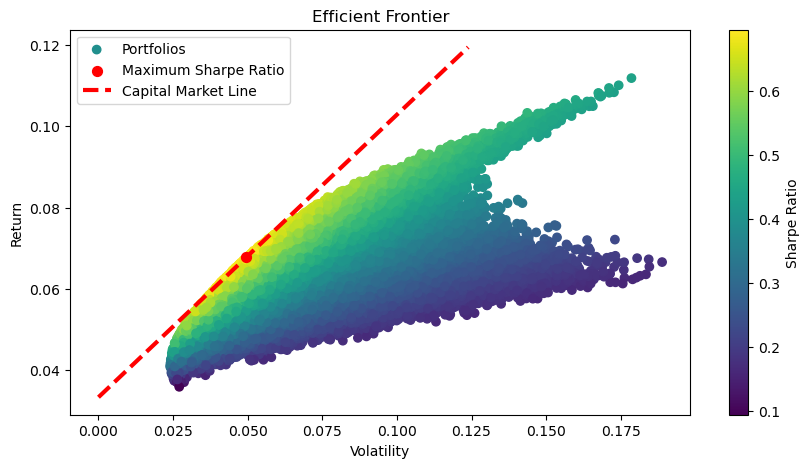

Maximum Sharpe Ratio Return: 6.777%
Volatility: 4.955%

Optimized Weights:
S&P 500        0.161192
T-Bill         0.008167
T-Bond         0.165675
Baa Bond       0.424616
Real Estate    0.203504
Gold           0.036846
dtype: float64


In [26]:
# Plot Efficient Frontier
plt.figure(figsize=(10, 5))
plt.scatter(vols, rets, c=sharpes, cmap='viridis', label='Portfolios')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(vols[max_idx], rets[max_idx], c='red', s=50, label='Maximum Sharpe Ratio')
end_vol = vols[max_idx] * 2.5
end_ret = risk_free_rate + (rets[max_idx] - risk_free_rate) / vols[max_idx] * end_vol
plt.plot([0, end_vol], [risk_free_rate, end_ret], 'r--', linewidth=3, label='Capital Market Line')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

# Output results
weights_series = pd.Series(weights[max_idx], index=asset_names)
print(f"Maximum Sharpe Ratio Return: {rets[max_idx]:.3%}")
print(f"Volatility: {vols[max_idx]:.3%}")
print("\nOptimized Weights:")
print(weights_series)

- **Efficient Frontier Visualization**:
    - The chart displays a variety of portfolios, with the efficient frontier being the upper edge of the colored region.
    - The color gradient indicates the Sharpe Ratio of each portfolio, with warmer colors (yellow) representing higher Sharpe Ratios.

- **Maximum Sharpe Ratio Portfolio**:
    - Marked by a red dot, indicating the portfolio on the efficient frontier with the highest Sharpe Ratio, often referred to as the Tangency Portfolio.
    - This portfolio has an expected return of 6.777% with a volatility of 4.955%.

- **Capital Market Line (CML)**:
    - Represented by the dashed red line, it shows the risk-return trade-off of efficient portfolios when combined with the risk-free asset.
    - The slope of the CML gives the Sharpe Ratio of the market portfolio.

- **Optimized Weights**:
    - The weights for the portfolio with the maximum Sharpe Ratio are displayed, indicating how much of each asset class should be included for the optimal risk-adjusted return.
    - The allocation is diversified across various asset classes, with a significant weight in the Baa Bond and Real Estate, suggesting a preference for assets with stable returns.
    


### Pros of the Optimized Portfolio
- **Diversified Asset Allocation:** The portfolio includes a mix of equities, bonds, real estate, and gold, which helps in reducing overall risk and enhancing stability.
- **Low Volatility:** With a volatility of 4.955%, the portfolio is designed to offer lower risk, making it suitable for conservative investors or those nearing retirement.
- **Significant Allocation to Bonds:** The high allocation to Baa bonds (42.46%) provides steady income and acts as a buffer against stock market fluctuations.
- **Real Estate Inclusion:** By allocating 20.35% to real estate, the portfolio benefits from a tangible asset known for its inflation hedging properties and potential for rental income.
- **Gold as a Hedge:** A small allocation to gold (3.68%) can serve as an insurance policy against major financial crises and inflation.

### Cons of the Optimized Portfolio
- **Lower Growth Potential:** A higher focus on bonds and real estate may limit the growth potential of the portfolio, which could be a drawback during bull markets.
- **Minimal Exposure to Equities:** With only 16.12% invested in the S&P 500, the portfolio might not capitalize fully on the growth opportunities offered by stock markets.
- **Complexity in Rebalancing:** The diverse nature of the assets might make rebalancing the portfolio more complex and costly, especially with tangible assets like real estate.
- **Sensitivity to Interest Rates:** Given the significant bond allocation, the portfolio could be adversely affected by rising interest rates, particularly impacting Baa bonds.
- **Low Allocation to Gold:** While gold can hedge against extreme risks, the relatively low allocation might limit its effectiveness in significantly turbulent financial times.



# Risk-Return Trade-Off of Portfolios

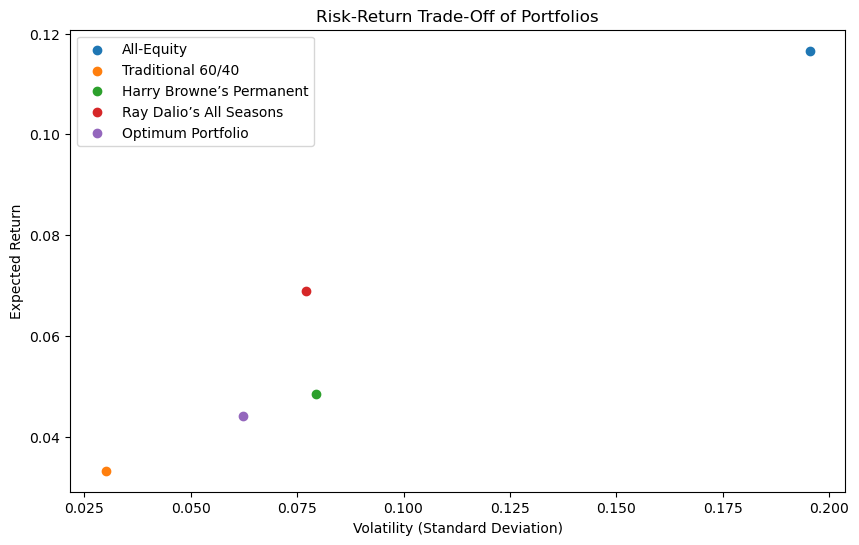

In [82]:
annual_returns_plot = np.array([0.11658493, 0.0333, 0.0485, 0.069, 0.0441, 0.065, 0.00682])
volatility_plot = np.array([0.1955, 0.03, 0.07951, 0.077, 0.0624, 0.2077,0.00611])
portfolio_plot = np.array(["All-Equity","Traditional 60/40", "Harry Browne’s Permanent", "Ray Dalio’s All Seasons", "Optimum Portfolio"])

plt.figure(figsize=(10, 6))
plt.title('Risk-Return Trade-Off of Portfolios')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')

for i, portfolio in enumerate(portfolio_plot):
    ret = annual_returns_plot[i]
    vol = volatility_plot[i]
    plt.scatter(vol, ret, label=portfolio)
    
plt.legend()
plt.show()

- **All-Equity Portfolio**: This portfolio has the highest expected return, but it also comes with the highest volatility. It's positioned at the top right on the chart, indicating a higher risk, higher reward scenario.

- **Traditional 60/40**: A balanced portfolio that typically consists of 60% equities and 40% bonds. It has moderate expected returns with moderate volatility, providing a balanced risk-reward profile.

- **Harry Browne's Permanent**: This portfolio is likely designed for long-term stability and includes a mix of assets to perform under various economic conditions. Its expected return is lower than the All-Equity and Traditional 60/40 portfolios, but it also exhibits lower volatility.

- **Ray Dalio's All Seasons**: Based on Ray Dalio's principles of risk parity and diversification, this portfolio aims to perform well in all economic seasons. It shows a lower expected return compared to the All-Equity and Traditional 60/40 portfolios but has a volatility comparable to Harry Browne's Permanent portfolio.

- **Optimum Portfolio**: This portfolio is positioned towards the bottom right, indicating it has the lowest volatility among all the portfolios shown, as well as a reasonably high expected return. It is deemed "optimum" due to its position on the efficient frontier – it offers the best possible expected return for a given level of risk according to modern portfolio theory.

The **Optimum Portfolio** is considered the best among these options because:
- It has the lowest volatility, which indicates a lower risk of fluctuating returns.
- Despite its low risk, it still offers a relatively high expected return, signifying efficiency in its risk-return trade-off.
- It is likely positioned on the efficient frontier, meaning there's no other portfolio that could deliver a higher expected return for the same level of risk, making it the most efficient choice for risk-averse investors.


#  Utility function (lambda)

In [83]:
lambda_coefficient = 4

portfolios = {
    "All-Equity": {"return": 0.116578, "volatility": 0.195508},
    "Traditional 60/40": {"return": 0.089382, "volatility": 0.12225},
    "Harry Browne’s Permanent": {"return": 0.066023, "volatility": 0.07308},
    "Ray Dalio’s All Seasons": {"return": 0.07153, "volatility": 0.07832},
    "Custom Portfolio": {"return": 0.06777, "volatility": 0.04955}
}

for name, data in portfolios.items():
    utility = data["return"] - (lambda_coefficient / 2) * (data["volatility"] ** 2)
    print(f"Utility for {name}: {utility:.4f}")

Utility for All-Equity: 0.0401
Utility for Traditional 60/40: 0.0595
Utility for Harry Browne’s Permanent: 0.0553
Utility for Ray Dalio’s All Seasons: 0.0593
Utility for Custom Portfolio: 0.0629


# Why our Portfolio is best for risk-averse Investor

- **Assumed Risk Aversion and Portfolio Allocation**:
    - Risk aversion level is set at 4, reflecting a preference for lower risk investments.
    - Allocation includes a mix of S&P 500 16.11%, T-Bill 0.82%, T-Bond 16.56%, Baa Bond 42.46%, Real Estate 20.35% and Gold 3.68%. 

- **Diversification**:
    - The portfolio spreads investment across equities, bonds, real estate, and gold for broad diversification.

- **Stability and Capital Preservation**:
    - The inclusion of Treasury bills and bonds, along with investment-grade Baa bonds, provides stability and capital preservation. These assets are generally less volatile than equities and offer a reliable income stream, making them suitable for risk-averse investors seeking to protect their principal investment.
    
- **Inflation Protection**:
    - The portfolio is reasonably protected from the inflation risk by the presence of real estate and gold since they act as an hedge against inflation.
    
- **Moderate Equity Exposure**:
    - The portfolio isn’t completely relied on the performance of equity as an asset class. Equities are given a weight of 16.11% and this seems to be a safe bet for acting as the necessary growth driver for the portfolio but also not overly weighed, making it less risky. Since overallocation to equity would result in a highly risky portfolio. Though equities have performed well in the long run they can also hurt one’s portfolio when the market is in the downturn. This allows the investor to benefit from the potential long-term growth of the stock market while limiting downside risk, which aligns well with the risk aversion profile of 4.

- **Liquidity and Flexibility**:
    - The portfolio maintains liquidity through allocations in assets like Treasury bills and a moderate allocation to equities. This liquidity provides the flexibility to adjust the portfolio in response to changing market conditions or investment objectives without significant transaction costs or delays. 


# Limitations of our Analysis

- **Limitations of Analysis**:
    - Limited data points restrict the thoroughness and accuracy of the mean-variance efficiency analysis over different time periods.
    - The analysis may contain data mining bias, influencing the results based on selected data patterns that may not be replicable.
    - Vulnerability to look-ahead bias, where future information is inadvertently used, potentially skewing the assessment of the portfolio's performance.
